Check if virtual environment is active

In [1]:
import sys
print(sys.prefix)
sys.prefix != sys.base_prefix # Should result in true

/home/addy/.pyenv/versions/3.12.0


False

Imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

2025-01-16 23:17:38.467903: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-16 23:17:38.476268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737049658.486247   45403 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737049658.489246   45403 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-16 23:17:38.499722: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Checking Tensorflow version

In [3]:
print(tf.__version__)

2.18.0


Reading dataset

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Label Encoding (Feature Scaling)

In [5]:
cols_to_enc = ['ChestPainType', 'ExerciseAngina', 'RestingECG', 'Sex', 'ST_Slope']
enc = LabelEncoder()
for col in cols_to_enc:
    if col in df.columns:
        df[col] = enc.fit_transform(df[col])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Training neural network model

In [6]:
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('Models/Neural Network/neuralNetworkModel.keras', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

model.fit(X_train, y_train, epochs=2000, batch_size=64, validation_split=0.1, callbacks=[checkpoint], verbose=1)

best_model = tf.keras.models.load_model('Models/Neural Network/neuralNetworkModel.keras')


Epoch 1/2000


I0000 00:00:1735987201.298824    3735 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1208 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
/home/addy/Desktop/Heart-Disease-Prediction-Capstone-Project-Group-55/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1735987203.461854    7953 service.cc:148] XLA service 0x7771c0018b10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735987203.462317    7953 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-01-04 16:10:03.529583: I tensorflow/compil

 1/11 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.4531 - loss: 5.3774

I0000 00:00:1735987205.448281    7953 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.4814 - loss: 3.6836
Epoch 1: val_accuracy improved from -inf to 0.48649, saving model to Models/Neural Network/neuralNetworkModel.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 355ms/step - accuracy: 0.4810 - loss: 3.6471 - val_accuracy: 0.4865 - val_loss: 1.1293
Epoch 2/2000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5156 - loss: 2.3333
Epoch 2: val_accuracy did not improve from 0.48649
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5267 - loss: 1.8795 - val_accuracy: 0.4865 - val_loss: 0.7063
Epoch 3/2000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5156 - loss: 1.1109
Epoch 3: val_accuracy improved from 0.48649 to 0.59459, saving model to Models/Neural Network/neuralNetworkModel.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5210 - loss: 1.1268 - val_accuracy: 0.5946 - val_loss: 0.6227
Epoch 4/2000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5156 - loss: 0.9881
Epoch 4: val_accuracy did not 

Classification Report

In [7]:
probabilities = best_model.predict(X_test)

threshold = 0.5

binary_preds = np.where(probabilities.flatten() > threshold, 1, 0)

print("Classification Report: ")
print(classification_report(y_test, binary_preds))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step
Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        77
           1       0.91      0.80      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



Monte Carlo Dropout

In [8]:
class MonteCarloDropout(Model):
    def __init__(self, **kwargs):
        super(MonteCarloDropout, self).__init__(**kwargs)
        self.dense1 = Dense(128, activation='relu')
        self.dropout1 = Dropout(0.2)
        
        self.dense2 = Dense(64, activation='relu')
        self.dropout2 = Dropout(0.2)

        self.dense3 = Dense(32, activation='relu')
        self.dropout3 = Dropout(0.2)

        self.output_layer = Dense(1, activation='sigmoid')
    
    def call(self, inputs, training=None):
        x = self.dense1(inputs)
        x = self.dropout1(x, training=True) # keeping dropout active

        x = self.dense2(inputs)
        x = self.dropout2(x, training=True) # keeping dropout active

        x = self.dense3(inputs)
        x = self.dropout3(x, training=True) # keeping dropout active

        return self.output_layer(x)

mcModel = MonteCarloDropout()
mcModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

mcCheckpoint = ModelCheckpoint('mcDropoutModel.keras', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

mcModel.fit(X_train, y_train, epochs=2000, batch_size=64, validation_split=0.1, callbacks=[mcCheckpoint], verbose=1)

finalMCModel = tf.keras.models.load_model('mcDropoutModel.keras', custom_objects={'MonteCarloDropout': MonteCarloDropout})

def monteCarloPrediction(model, X, passes=100):
    predictions = np.stack([model(X, training=True).numpy().flatten() for _ in range(passes)], axis=0)
    return predictions

monteCarloPredictions = monteCarloPrediction(finalMCModel, X_test, passes=100)

mean = monteCarloPredictions.mean(axis=0)
std = monteCarloPredictions.std(axis=0)     # measure of uncertainity

mcThreshold = 0.5
mc_bin_pred = np.where(mean > mcThreshold, 1, 0)

Epoch 1/2000


/home/addy/Desktop/Heart-Disease-Prediction-Capstone-Project-Group-55/.venv/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:735: UserWarning: Gradients do not exist for variables ['monte_carlo_dropout/dense_6/kernel', 'monte_carlo_dropout/dense_6/bias', 'monte_carlo_dropout/dense_7/kernel', 'monte_carlo_dropout/dense_7/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5508 - loss: 59.6314 
Epoch 1: val_accuracy improved from -inf to 0.47297, saving model to mcDropoutModel.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.5509 - loss: 59.4319 - val_accuracy: 0.4730 - val_loss: 50.8355
Epoch 2/2000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5312 - loss: 46.3866
Epoch 2: val_accuracy did not improve from 0.47297
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5330 - loss: 46.6609 - val_accuracy: 0.4730 - val_loss: 47.6699
Epoch 3/2000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5781 - loss: 27.9419
Epoch 3: val_accuracy did not improve from 0.47297
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5242 - loss: 36.4348 - val_accuracy: 0.4459 - val_loss: 38.2509
Epoch 4/2000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5156 - loss: 30.5957
Epoch 4: val_accuracy did not improve from 0.47297
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4997 - loss

Classification Report and Uncertainity Estimates

In [9]:
print("Classification Report: ")
print(classification_report(y_test, mc_bin_pred))

print("Uncertainity Estimates (Standard Deviation of Predictions): ")
print(std)

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.86      0.81        77
           1       0.89      0.82      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

Uncertainity Estimates (Standard Deviation of Predictions): 
[0.08426172 0.20822    0.07198974 0.12754643 0.10352366 0.14562492
 0.14396617 0.08820814 0.07986788 0.06542158 0.0913646  0.08784658
 0.10373645 0.11484288 0.13481434 0.0708162  0.10443565 0.04202638
 0.12081155 0.2770842  0.15682572 0.13752167 0.08513276 0.16471194
 0.09238005 0.11505025 0.08213396 0.08567131 0.08359865 0.09249443
 0.10542094 0.08314438 0.11134259 0.11506141 0.06381318 0.16273087
 0.09313011 0.07472752 0.11847635 0.11787923 0.09289322 0.11208547
 0.12717499 0.07908801 0.0857464  0.12694205 0.21902958 0.10968385
 0.08249407 0.06759512 0.09639812 0.08404569 0.09318

Adding L2 Regularization, Batch Normalization, Early Stopping, and Learning Rate Schedule

In [22]:
from tensorflow.keras.saving import register_keras_serializable

@register_keras_serializable()
class improvedModelMCDropout(Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)

improvedModel = Sequential()
kernel_reg_val = 0.006
dropout_val = 0.18
learning_rate_val = 0.0002
es_pat = 250
lr_pat = 125

improvedModel.add(Dense(128, activation='relu', kernel_regularizer=l2(kernel_reg_val)))
improvedModel.add(BatchNormalization())
improvedModel.add(improvedModelMCDropout(rate=dropout_val))

improvedModel.add(Dense(64, activation='relu', kernel_regularizer=l2(kernel_reg_val)))
improvedModel.add(BatchNormalization())
improvedModel.add(improvedModelMCDropout(rate=dropout_val))

improvedModel.add(Dense(32, activation='relu', kernel_regularizer=l2(kernel_reg_val)))
improvedModel.add(BatchNormalization())
improvedModel.add(improvedModelMCDropout(rate=dropout_val))

improvedModel.add(Dense(1, activation='sigmoid'))

improvedModel.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_val), metrics=['accuracy'])

improvedModelCheckpoint = ModelCheckpoint('improvedNeuralNetworkModel.keras', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

earlyStopping = EarlyStopping(monitor='val_loss', patience=es_pat, restore_best_weights=True, verbose=1)
lrScheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=lr_pat, verbose=1, min_lr=1e-9)

history = improvedModel.fit(X_train, y_train, epochs=2000, batch_size=16, validation_split=0.1, callbacks=[improvedModelCheckpoint, earlyStopping, lrScheduler], verbose=1)

finalImprovedModel = tf.keras.models.load_model('improvedNeuralNetworkModel.keras', custom_objects={'improvedModelMCDropout' : improvedModelMCDropout})

def improvedMCPrediction(model, X, T=50):
    preds = np.array([model.predict(X) for _ in range(T)])
    return preds.mean(axis=0), preds.std(axis=0)

improvedMean, improvedStd = improvedMCPrediction(finalImprovedModel, X_test, T=50)

improvedModelThreshold = 0.5
improved_bin_pred = np.where(improvedMean > improvedModelThreshold, 1, 0)

print("Classification Report: ")
print(classification_report(y_test, improved_bin_pred))

Epoch 1/2000
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4652 - loss: 1.8807
Epoch 1: val_accuracy improved from -inf to 0.63514, saving model to improvedNeuralNetworkModel.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.4659 - loss: 1.8784 - val_accuracy: 0.6351 - val_loss: 1.8280 - learning_rate: 2.0000e-04
Epoch 2/2000
37/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5800 - loss: 1.6280 
Epoch 2: val_accuracy improved from 0.63514 to 0.70270, saving model to improvedNeuralNetworkModel.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5794 - loss: 1.6262 - val_accuracy: 0.7027 - val_loss: 1.4762 - learning_rate: 2.0000e-04
Epoch 3/2000
38/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6413 - loss: 1.5755
Epoch 3: val_accuracy did not improve from 0.70270
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6441 - loss: 1.5666 - val_accuracy: 0.6622 - val_loss: 1.5077 - learning_rate: 2.0000e-04
Epoch 4/2000
21/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Loss over Epochs plot

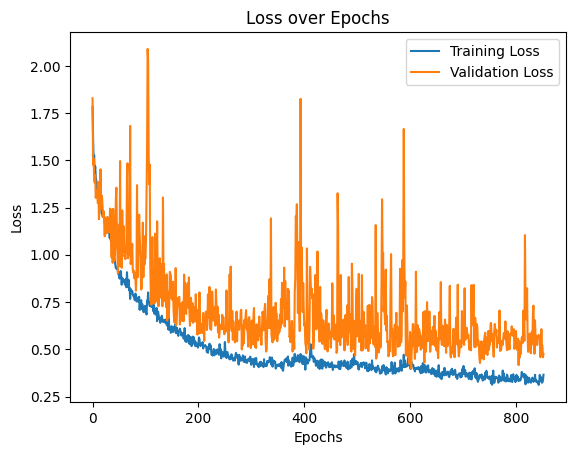

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Accuracy over Epochs plot

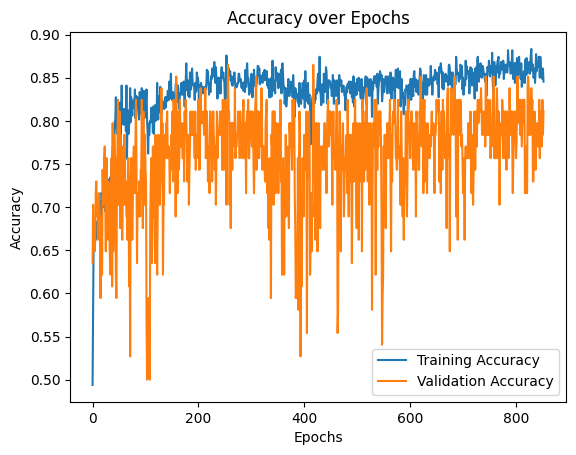

In [40]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Confusion Matrix

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


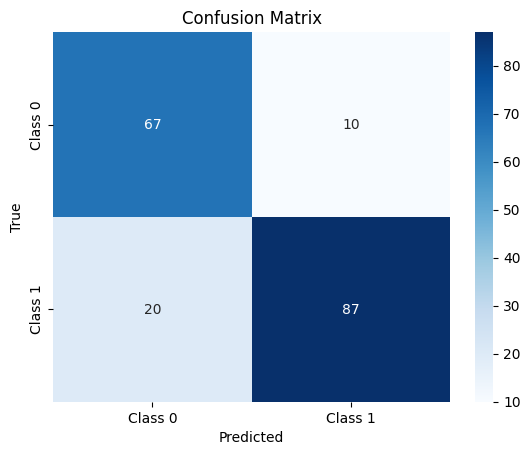

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = finalImprovedModel.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ROC Curve

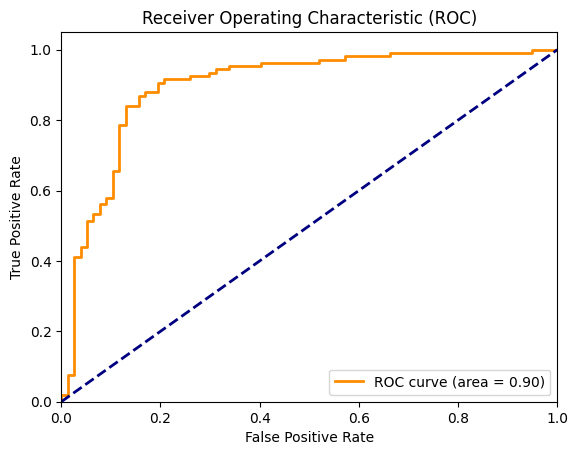

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Feature Importance using SHAP

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Using 734 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/184 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 47s 1ms/step


  1%|          | 1/184 [01:07<3:26:00, 67.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step


  1%|          | 2/184 [02:22<3:37:39, 71.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 51s 1ms/step


  2%|▏         | 3/184 [03:30<3:31:46, 70.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 967us/step


  2%|▏         | 4/184 [04:30<3:18:21, 66.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 949us/step


  3%|▎         | 5/184 [05:36<3:17:12, 66.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 955us/step


  3%|▎         | 6/184 [06:40<3:13:42, 65.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 947us/step


  4%|▍         | 7/184 [07:42<3:09:30, 64.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 963us/step


  4%|▍         | 8/184 [08:43<3:05:44, 63.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 936us/step


  5%|▍         | 9/184 [09:42<3:00:35, 61.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 939us/step


  5%|▌         | 10/184 [10:47<3:02:13, 62.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 978us/step


  6%|▌         | 11/184 [11:52<3:03:22, 63.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 980us/step


  7%|▋         | 12/184 [12:59<3:05:08, 64.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 946us/step


  7%|▋         | 13/184 [14:03<3:03:52, 64.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 938us/step


  8%|▊         | 14/184 [15:09<3:03:42, 64.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 912us/step


  8%|▊         | 15/184 [16:13<3:02:02, 64.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 976us/step


  9%|▊         | 16/184 [17:20<3:03:08, 65.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 944us/step


  9%|▉         | 17/184 [18:25<3:01:12, 65.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 909us/step


 10%|▉         | 18/184 [19:26<2:56:36, 63.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 916us/step


 10%|█         | 19/184 [20:29<2:55:24, 63.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 952us/step


 11%|█         | 20/184 [21:32<2:53:15, 63.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 967us/step


 11%|█▏        | 21/184 [22:35<2:52:08, 63.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 957us/step


 12%|█▏        | 22/184 [23:36<2:49:28, 62.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 959us/step


 12%|█▎        | 23/184 [24:42<2:50:29, 63.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 960us/step


 13%|█▎        | 24/184 [25:44<2:48:07, 63.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 968us/step


 14%|█▎        | 25/184 [26:48<2:48:11, 63.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 972us/step


 14%|█▍        | 26/184 [27:52<2:47:26, 63.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 947us/step


 15%|█▍        | 27/184 [28:54<2:44:52, 63.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 956us/step


 15%|█▌        | 28/184 [29:54<2:41:43, 62.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 959us/step


 16%|█▌        | 29/184 [30:53<2:38:12, 61.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 963us/step


 16%|█▋        | 30/184 [31:54<2:36:49, 61.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 954us/step


 17%|█▋        | 31/184 [32:49<2:31:17, 59.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 965us/step


 17%|█▋        | 32/184 [33:52<2:33:10, 60.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 973us/step


 18%|█▊        | 33/184 [34:56<2:35:03, 61.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 922us/step


 18%|█▊        | 34/184 [36:01<2:35:56, 62.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 941us/step


 19%|█▉        | 35/184 [37:07<2:37:57, 63.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 961us/step


 20%|█▉        | 36/184 [38:13<2:39:01, 64.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 926us/step


 20%|██        | 37/184 [39:16<2:36:37, 63.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 971us/step


 21%|██        | 38/184 [40:23<2:37:54, 64.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 954us/step


 21%|██        | 39/184 [41:30<2:38:00, 65.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 989us/step


 22%|██▏       | 40/184 [42:38<2:38:57, 66.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 979us/step


 22%|██▏       | 41/184 [43:46<2:39:20, 66.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 946us/step


 23%|██▎       | 42/184 [44:52<2:37:10, 66.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 964us/step


 23%|██▎       | 43/184 [45:59<2:36:59, 66.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 952us/step


 24%|██▍       | 44/184 [47:07<2:36:09, 66.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 956us/step


 24%|██▍       | 45/184 [48:14<2:35:04, 66.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 911us/step


 25%|██▌       | 46/184 [49:19<2:32:45, 66.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 968us/step


 26%|██▌       | 47/184 [50:26<2:31:54, 66.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 957us/step


 26%|██▌       | 48/184 [51:32<2:30:42, 66.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 967us/step


 27%|██▋       | 49/184 [52:40<2:30:23, 66.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 47s 991us/step


 27%|██▋       | 50/184 [53:46<2:29:14, 66.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 968us/step


 28%|██▊       | 51/184 [54:50<2:26:10, 65.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 947us/step


 28%|██▊       | 52/184 [55:57<2:25:41, 66.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 921us/step


 29%|██▉       | 53/184 [56:59<2:21:24, 64.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 908us/step


 29%|██▉       | 54/184 [58:02<2:19:16, 64.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 906us/step


 30%|██▉       | 55/184 [59:04<2:16:57, 63.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 959us/step


 30%|███       | 56/184 [1:00:08<2:16:13, 63.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 984us/step


 31%|███       | 57/184 [1:01:16<2:17:53, 65.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 930us/step


 32%|███▏      | 58/184 [1:02:23<2:17:23, 65.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 967us/step


 32%|███▏      | 59/184 [1:03:30<2:17:37, 66.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 956us/step


 33%|███▎      | 60/184 [1:04:37<2:17:04, 66.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 975us/step


 33%|███▎      | 61/184 [1:05:46<2:17:17, 66.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 961us/step


 34%|███▎      | 62/184 [1:06:53<2:16:36, 67.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 935us/step


 34%|███▍      | 63/184 [1:07:59<2:14:41, 66.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 958us/step


 35%|███▍      | 64/184 [1:09:06<2:13:57, 66.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 976us/step


 35%|███▌      | 65/184 [1:10:13<2:12:38, 66.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 961us/step


 36%|███▌      | 66/184 [1:11:21<2:11:55, 67.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 956us/step


 36%|███▋      | 67/184 [1:12:28<2:10:43, 67.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 945us/step


 37%|███▋      | 68/184 [1:13:34<2:09:28, 66.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 42s 898us/step


 38%|███▊      | 69/184 [1:14:39<2:06:58, 66.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 987us/step


 38%|███▊      | 70/184 [1:15:47<2:07:06, 66.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 967us/step


 39%|███▊      | 71/184 [1:16:55<2:06:32, 67.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 47s 994us/step


 39%|███▉      | 72/184 [1:18:04<2:06:25, 67.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 967us/step


 40%|███▉      | 73/184 [1:19:11<2:05:00, 67.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 42s 898us/step


 40%|████      | 74/184 [1:20:15<2:01:43, 66.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 943us/step


 41%|████      | 75/184 [1:21:21<2:00:21, 66.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 950us/step


 41%|████▏     | 76/184 [1:22:21<1:55:45, 64.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 47s 994us/step


 42%|████▏     | 77/184 [1:23:27<1:55:31, 64.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 946us/step


 42%|████▏     | 78/184 [1:24:30<1:53:46, 64.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 924us/step


 43%|████▎     | 79/184 [1:25:36<1:53:26, 64.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 924us/step


 43%|████▎     | 80/184 [1:26:41<1:52:36, 64.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 47s 991us/step


 44%|████▍     | 81/184 [1:27:48<1:52:32, 65.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 967us/step


 45%|████▍     | 82/184 [1:28:49<1:48:59, 64.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 40s 847us/step


 45%|████▌     | 83/184 [1:29:45<1:43:57, 61.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 954us/step


 46%|████▌     | 84/184 [1:30:50<1:44:22, 62.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 956us/step


 46%|████▌     | 85/184 [1:31:53<1:43:44, 62.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 944us/step


 47%|████▋     | 86/184 [1:32:51<1:40:13, 61.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 973us/step


 47%|████▋     | 87/184 [1:33:55<1:40:13, 61.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 980us/step


 48%|████▊     | 88/184 [1:34:58<1:39:56, 62.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 979us/step


 48%|████▊     | 89/184 [1:36:03<1:39:46, 63.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 932us/step


 49%|████▉     | 90/184 [1:37:01<1:36:28, 61.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 944us/step


 49%|████▉     | 91/184 [1:38:01<1:34:59, 61.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 967us/step


 50%|█████     | 92/184 [1:39:03<1:34:15, 61.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 48s 1ms/step


 51%|█████     | 93/184 [1:40:06<1:33:38, 61.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 980us/step


 51%|█████     | 94/184 [1:41:03<1:30:49, 60.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 960us/step


 52%|█████▏    | 95/184 [1:42:03<1:29:11, 60.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 976us/step


 52%|█████▏    | 96/184 [1:43:03<1:28:26, 60.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 42s 898us/step


 53%|█████▎    | 97/184 [1:43:55<1:23:34, 57.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 964us/step


 53%|█████▎    | 98/184 [1:44:50<1:21:39, 56.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 959us/step


 54%|█████▍    | 99/184 [1:45:57<1:24:51, 59.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 924us/step


 54%|█████▍    | 100/184 [1:46:53<1:22:24, 58.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 923us/step


 55%|█████▍    | 101/184 [1:47:51<1:20:50, 58.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 937us/step


 55%|█████▌    | 102/184 [1:48:46<1:18:37, 57.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 932us/step


 56%|█████▌    | 103/184 [1:49:44<1:17:41, 57.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 988us/step


 57%|█████▋    | 104/184 [1:50:48<1:19:35, 59.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 979us/step


 57%|█████▋    | 105/184 [1:51:50<1:19:29, 60.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 939us/step


 58%|█████▊    | 106/184 [1:52:48<1:17:18, 59.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 931us/step


 58%|█████▊    | 107/184 [1:53:43<1:14:48, 58.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 963us/step


 59%|█████▊    | 108/184 [1:54:51<1:17:18, 61.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 983us/step


 59%|█████▉    | 109/184 [1:55:59<1:18:58, 63.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 957us/step


 60%|█████▉    | 110/184 [1:56:57<1:16:02, 61.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 41s 879us/step


 60%|██████    | 111/184 [1:57:54<1:13:18, 60.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 42s 891us/step


 61%|██████    | 112/184 [1:58:45<1:08:57, 57.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 41s 883us/step


 61%|██████▏   | 113/184 [1:59:39<1:06:47, 56.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 41s 874us/step


 62%|██████▏   | 114/184 [2:00:29<1:03:36, 54.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 41s 877us/step


 62%|██████▎   | 115/184 [2:01:22<1:02:05, 53.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 42s 888us/step


 63%|██████▎   | 116/184 [2:02:19<1:02:08, 54.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 954us/step


 64%|██████▎   | 117/184 [2:03:22<1:04:13, 57.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 979us/step


 64%|██████▍   | 118/184 [2:04:22<1:03:53, 58.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 948us/step


 65%|██████▍   | 119/184 [2:05:26<1:04:56, 59.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 986us/step


 65%|██████▌   | 120/184 [2:06:27<1:04:08, 60.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 932us/step


 66%|██████▌   | 121/184 [2:07:28<1:03:36, 60.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 917us/step


 66%|██████▋   | 122/184 [2:08:28<1:02:26, 60.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 982us/step


 67%|██████▋   | 123/184 [2:09:37<1:03:49, 62.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 972us/step


 67%|██████▋   | 124/184 [2:10:42<1:03:26, 63.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 952us/step


 68%|██████▊   | 125/184 [2:11:49<1:03:27, 64.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 41s 879us/step


 68%|██████▊   | 126/184 [2:12:52<1:02:04, 64.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 41s 882us/step


 69%|██████▉   | 127/184 [2:13:56<1:00:53, 64.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 40s 851us/step


 70%|██████▉   | 128/184 [2:14:45<55:29, 59.45s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 906us/step


 70%|███████   | 129/184 [2:15:41<53:44, 58.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 912us/step


 71%|███████   | 130/184 [2:16:46<54:27, 60.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 42s 893us/step


 71%|███████   | 131/184 [2:17:51<54:32, 61.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 939us/step


 72%|███████▏  | 132/184 [2:18:58<54:50, 63.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 988us/step


 72%|███████▏  | 133/184 [2:19:59<53:25, 62.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 968us/step


 73%|███████▎  | 134/184 [2:20:58<51:24, 61.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 934us/step


 73%|███████▎  | 135/184 [2:21:56<49:16, 60.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 47s 997us/step


 74%|███████▍  | 136/184 [2:22:58<48:45, 60.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 47s 992us/step


 74%|███████▍  | 137/184 [2:24:00<47:54, 61.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 947us/step


 75%|███████▌  | 138/184 [2:24:58<46:20, 60.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 937us/step


 76%|███████▌  | 139/184 [2:26:00<45:34, 60.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 47s 993us/step


 76%|███████▌  | 140/184 [2:27:02<44:52, 61.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 986us/step


 77%|███████▋  | 141/184 [2:28:08<44:52, 62.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 946us/step


 77%|███████▋  | 142/184 [2:29:09<43:24, 62.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 970us/step


 78%|███████▊  | 143/184 [2:30:10<42:11, 61.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 954us/step


 78%|███████▊  | 144/184 [2:31:16<42:05, 63.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 973us/step


 79%|███████▉  | 145/184 [2:32:18<40:42, 62.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 971us/step


 79%|███████▉  | 146/184 [2:33:19<39:24, 62.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 969us/step


 80%|███████▉  | 147/184 [2:34:18<37:44, 61.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 947us/step


 80%|████████  | 148/184 [2:35:18<36:36, 61.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 950us/step


 81%|████████  | 149/184 [2:36:18<35:24, 60.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 932us/step


 82%|████████▏ | 150/184 [2:37:18<34:14, 60.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 963us/step


 82%|████████▏ | 151/184 [2:38:18<33:04, 60.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 982us/step


 83%|████████▎ | 152/184 [2:39:15<31:42, 59.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 948us/step


 83%|████████▎ | 153/184 [2:40:14<30:40, 59.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 982us/step


 84%|████████▎ | 154/184 [2:41:17<30:11, 60.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 47s 996us/step


 84%|████████▍ | 155/184 [2:42:21<29:42, 61.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 47s 1ms/step


 85%|████████▍ | 156/184 [2:43:25<29:03, 62.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 967us/step


 85%|████████▌ | 157/184 [2:44:23<27:21, 60.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 47s 991us/step


 86%|████████▌ | 158/184 [2:45:26<26:42, 61.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 974us/step


 86%|████████▋ | 159/184 [2:46:28<25:39, 61.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 975us/step


 87%|████████▋ | 160/184 [2:47:34<25:08, 62.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 945us/step


 88%|████████▊ | 161/184 [2:48:34<23:51, 62.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 963us/step


 88%|████████▊ | 162/184 [2:49:42<23:22, 63.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 48s 1ms/step


 89%|████████▊ | 163/184 [2:50:49<22:43, 64.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 47s 994us/step


 89%|████████▉ | 164/184 [2:51:58<21:58, 65.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 48s 1ms/step


 90%|████████▉ | 165/184 [2:53:05<21:02, 66.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 38s 815us/step


 90%|█████████ | 166/184 [2:54:06<19:25, 64.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 978us/step


 91%|█████████ | 167/184 [2:55:15<18:40, 65.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 978us/step


 91%|█████████▏| 168/184 [2:56:21<17:36, 66.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 957us/step


 92%|█████████▏| 169/184 [2:57:23<16:13, 64.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 906us/step


 92%|█████████▏| 170/184 [2:58:17<14:20, 61.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 944us/step


 93%|█████████▎| 171/184 [2:59:11<12:49, 59.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 985us/step


 93%|█████████▎| 172/184 [3:00:08<11:44, 58.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 989us/step


 94%|█████████▍| 173/184 [3:01:07<10:47, 58.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 969us/step


 95%|█████████▍| 174/184 [3:02:05<09:45, 58.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 963us/step


 95%|█████████▌| 175/184 [3:03:09<09:01, 60.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step


 96%|█████████▌| 176/184 [3:04:13<08:10, 61.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step


 96%|█████████▌| 177/184 [3:05:13<07:06, 60.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 47s 1ms/step


 97%|█████████▋| 178/184 [3:06:23<06:21, 63.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 46s 977us/step


 97%|█████████▋| 179/184 [3:07:25<05:15, 63.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step


 98%|█████████▊| 180/184 [3:08:30<04:14, 63.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 937us/step


 98%|█████████▊| 181/184 [3:09:33<03:10, 63.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 45s 965us/step


 99%|█████████▉| 182/184 [3:10:36<02:06, 63.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 44s 939us/step


 99%|█████████▉| 183/184 [3:11:43<01:04, 64.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
46931/46931 ━━━━━━━━━━━━━━━━━━━━ 43s 915us/step


100%|██████████| 184/184 [3:12:44<00:00, 62.85s/it]


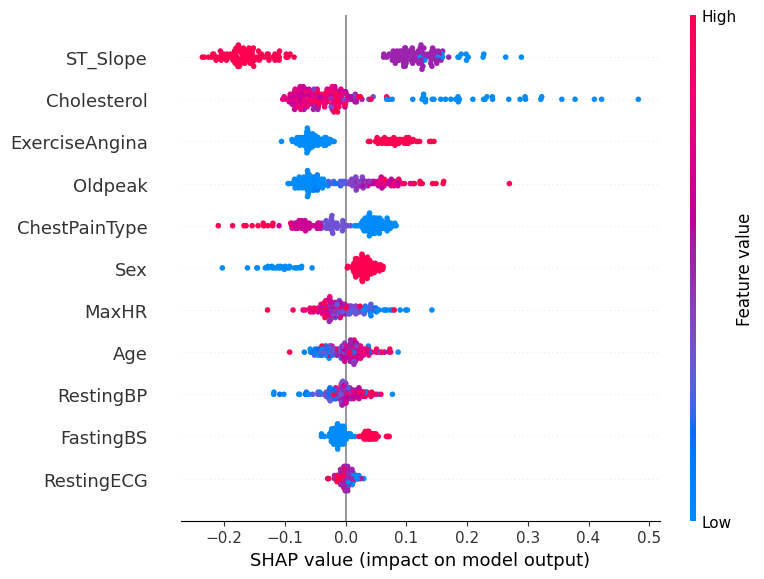

In [29]:
import shap

def predict_fn(X):
    return finalImprovedModel.predict(X)

explainer = shap.KernelExplainer(predict_fn, X_train)
shap_values = explainer.shap_values(X_test)
shap_values = np.squeeze(shap_values)

feature_names = X_test.columns if isinstance(X_test, pd.DataFrame) else [f"Feature {i}" for i in range(X_test.shape[1])]

shap.summary_plot(shap_values, X_test, feature_names=feature_names)  # Visualizing for the first class


In [28]:
print("SHAP Values Shape:", np.array(shap_values).shape)
print("X_test Shape:", X_test.shape)

SHAP Values Shape: (184, 11, 1)
X_test Shape: (184, 11)


Weights and Activations Visualization

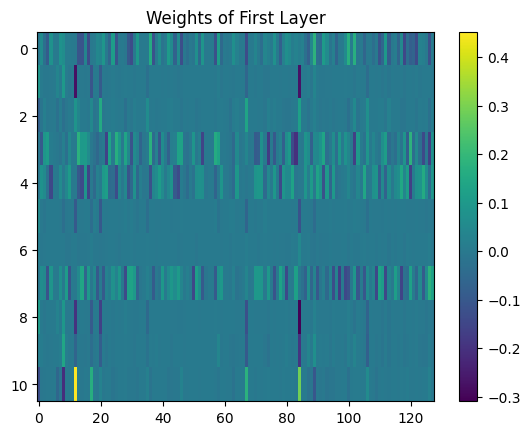

In [31]:

weights, biases = finalImprovedModel.layers[0].get_weights()
plt.imshow(weights, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Weights of First Layer')
plt.show()

Class Distribution

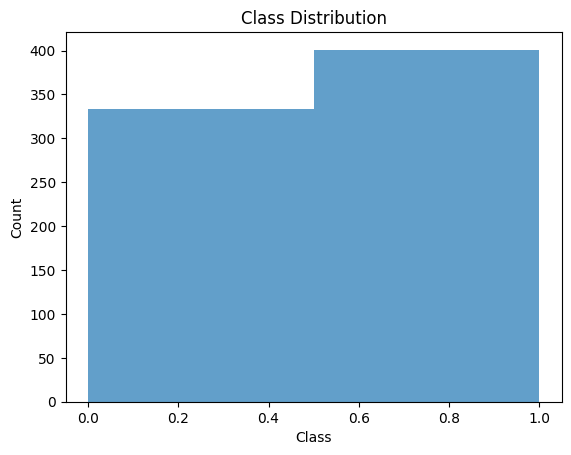

In [32]:
plt.hist(y_train, bins=2, alpha=0.7)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Prediction vs True Values Scatter Plot

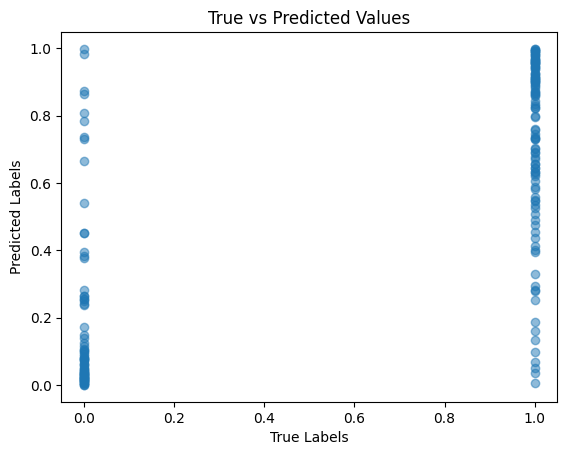

In [33]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True vs Predicted Values')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

Precision-Recall Curve

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


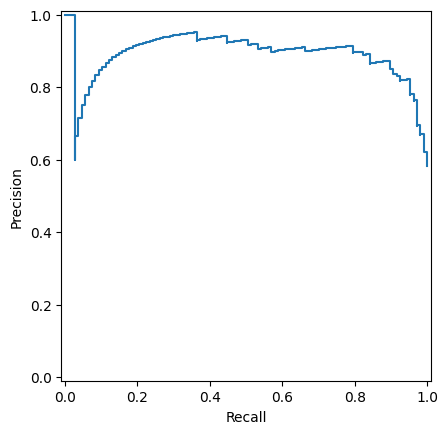

In [34]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
pred = finalImprovedModel.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()


t-SNE or PCA for Feature Visualization

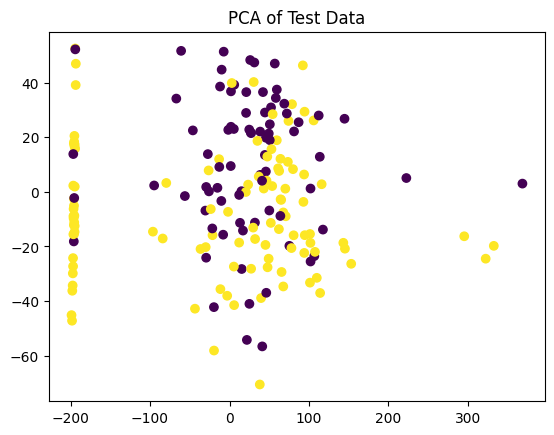

In [43]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

reduced_features = PCA(n_components=2).fit_transform(X_test)  # or use TSNE(n_components=2) 
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=y_test, cmap='viridis')
plt.title('PCA of Test Data')
plt.show()


Misclassified Samples Table

In [38]:
threshold = 0.5
binary_pred = (pred > threshold).astype(int)

misclassified = X_test[(y_test != binary_pred.flatten())]
misclassified['True Label'] = y_test[y_test != binary_pred.flatten()]
misclassified['Predicted Label'] = binary_pred.flatten()[y_test != binary_pred.flatten()]
print(misclassified.head())

     Age  Sex  ChestPainType  ...  ST_Slope  True Label  Predicted Label
165   46    1              3  ...         1           1                0
768   64    0              0  ...         1           0                1
39    48    0              0  ...         1           0                1
72    52    1              0  ...         1           1                0
655   40    1              0  ...         2           1                0

[5 rows x 13 columns]


/tmp/ipykernel_3735/749002948.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['True Label'] = y_test[y_test != binary_pred.flatten()]
/tmp/ipykernel_3735/749002948.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['Predicted Label'] = binary_pred.flatten()[y_test != binary_pred.flatten()]


Comparisions

In [30]:
org_accuracy = accuracy_score(y_test, binary_preds)
print(f"Original Model accuracy: {org_accuracy: .4f}")

mcDropout_accuracy = accuracy_score(y_test, mc_bin_pred)
print(f"MC Dropout Model accuracy: {mcDropout_accuracy: .4f}")

improved_model_accuracy = accuracy_score(y_test, improved_bin_pred)
print(f"Improved MC Dropout Model accuracy: {improved_model_accuracy: .4f}")

Original Model accuracy:  0.8424
MC Dropout Model accuracy:  0.8370
Improved MC Dropout Model accuracy:  0.8533
